Code adapted from [Optimization chapter](http://www.d2l.ai/chapter_optimization/) of Dive into Deep Learning

In [0]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

def show_trace_2d(f, res , color = 'red'):
    """Show the trace of 2d variables during optimization."""
    x1, x2 = zip(*res)
    plt.plot(x1, x2, '-o', color=color)
    x1 = np.arange(-5.5, 3.5, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')

In [0]:
def train_2d(trainer):
    """Optimize the objective function of 2d variables with a customized trainer."""
    """trainer(x1,x2,s_x1,s_x2) should return the updated positions x1, x2 and possible memory terms."""
    x1, x2 = -5, -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    for i in range(20):
        x1, x2, s_x1, s_x2 = trainer(x1, x2, s_x1, s_x2)
        res.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
    return res

# Gradient descent

In [0]:
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1 -0.943467, x2 -0.000073


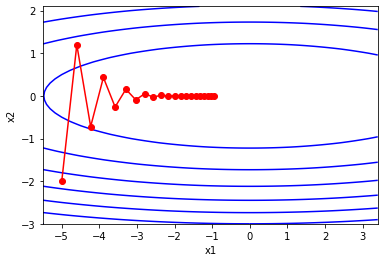

In [9]:
show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


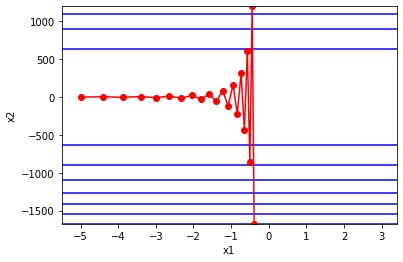

In [10]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

# Momemtum

In [0]:
eta, gamma = 0.4, 0.5

def momentum_2d(x1, x2, v1, v2):
    v1 = # your code
    v2 = # your code
    return x1 - v1, x2 - v2, v1, v2

epoch 20, x1 -0.062843, x2 0.001202


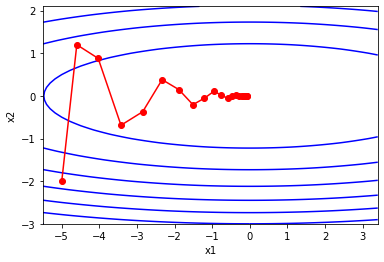

In [12]:
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


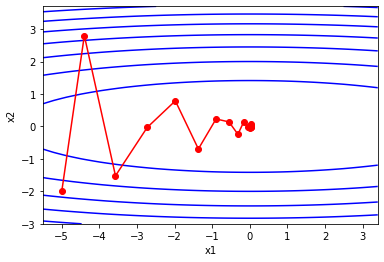

In [13]:
eta = 0.6
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 -0.589111, x2 0.698505


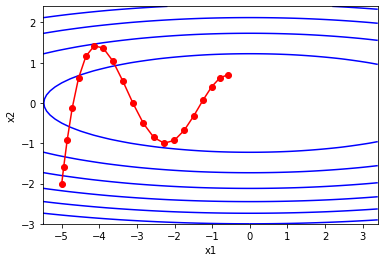

In [14]:
eta, gamma = 0.05, 0.9
show_trace_2d(f_2d, train_2d(momentum_2d))

# Nesterov accelerated gradient

In [0]:
eta, gamma = 0.05, 0.9

def Nesterov_2d(x1, x2, v1, v2):
    v1 = # your code
    v2 = # your code
    return x1 - v1, x2 - v2, v1, v2

epoch 20, x1 -0.751356, x2 0.071637
epoch 20, x1 -0.589111, x2 0.698505


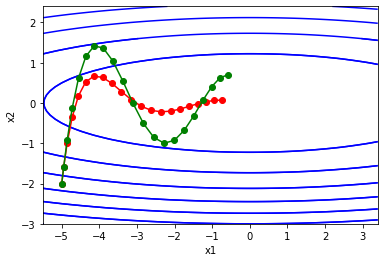

In [16]:
show_trace_2d(f_2d, train_2d(Nesterov_2d))
show_trace_2d(f_2d, train_2d(momentum_2d), color= 'green')

# Adagrad

In [0]:
import math

def adagrad_2d(x1, x2, s1, s2):
    # The first two terms are the independent variable gradients
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    #
    # your code here (hint: use math.sqrt)
    #
    return x1, x2, s1, s2

epoch 20, x1 -2.382563, x2 -0.158591


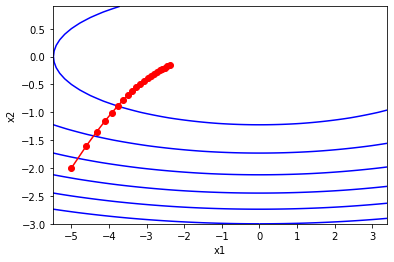

In [18]:
eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


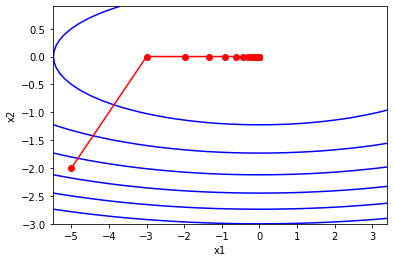

In [19]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

# RMSProp

In [0]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    #
    # your code here
    #
    return x1, x2, s1, s2

epoch 20, x1 -0.010599, x2 0.000000


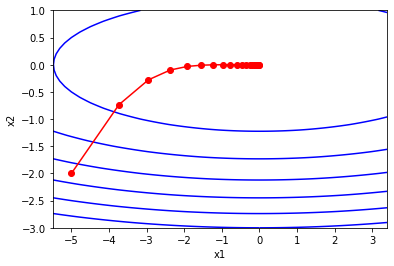

In [21]:
eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))

# Adam

In [0]:
def adam_2d(x1, x2, s1, s2 , t):
    beta1, beta2, eps = 0.9, 0.99, 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    #
    # your code here
    #
    return x1, x2, s1, s2

In [0]:
def train_adam_2d(trainer):
    """Optimize the objective function of 2d variables with Adam-li trainer."""
    """trainer(x1,x2,s_x1,s_x2) should return the updated positions x1, x2 and possible memory terms."""
    x1, x2 = -5, -2
    s_x1, s_x2 = [0,0,0], [0,0,0]
    res = [(x1, x2)]
    for i in range(20):
        x1, x2, s_x1, s_x2 = trainer(x1, x2, s_x1, s_x2, i)
        res.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
    return res

epoch 20, x1 0.414218, x2 0.086138


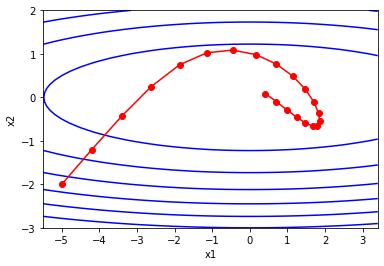

In [24]:
eta = 0.8
show_trace_2d(f_2d, train_adam_2d(adam_2d))

# AMSGrad

In [0]:
def amsgrad_2d(x1, x2, s1, s2 , t):
    beta1, beta2, eps = 0.9, 0.99, 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    #
    # your code here
    #
    return x1, x2, s1, s2

epoch 20, x1 -0.977985, x2 -0.470241
epoch 20, x1 -0.571139, x2 0.487553


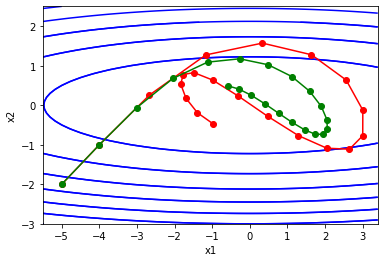

In [26]:
eta = 1
show_trace_2d(f_2d, train_adam_2d(amsgrad_2d))
show_trace_2d(f_2d, train_adam_2d(adam_2d), color ='green')